In [4]:
using Gadfly, Interact;

  likely near /opt/julia_packages/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /opt/julia_packages/.julia/v0.4/Interact/src/IJulia/setup.jl:157
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at ./loading.jl:243
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /opt/julia_packages/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /opt/julia_packages/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /opt/julia_packages/.julia/v0.4/Interact/src/IJulia/statedict.jl, in expression starting on line 1


In [33]:
#  Colors based on Color Brewer 3class Set 1
blue = colorant"#377eb8"; #blue
red  = colorant"#e41a1c"; #red

#define plot properties
set_default_plot_size(30cm, 12cm);
T = 10
t_fine_resolution=1000;
t_coarse_resolution=100;
t_spacing = 2T/t_fine_resolution;
t_val=linspace(-T,T,t_fine_resolution); 
t_coarse=linspace(-T,T,t_coarse_resolution);



#define plot style
properties = Guide.xlabel("t"), Geom.line,Theme(line_width=2pt, default_color=colorant"blue");
properties_x = Guide.xlabel("τ"), Guide.ylabel("x(τ)"),   Geom.line,Theme(line_width=2pt, default_color=colorant"red");
properties_y = Guide.xlabel("τ"), Guide.ylabel("y(t-τ)"), Geom.line,Theme(line_width=2pt, default_color=colorant"blue");

properties_prod = Guide.xlabel("τ"), Guide.ylabel("x(τ)y(t-τ)"), Geom.line,Theme(line_width=2pt, default_color=colorant"green");
properties_conv = Guide.xlabel("t"), Guide.ylabel("(x*y)(t)"),   Geom.line,Theme(line_width=2pt, default_color=colorant"green");

properties_time = Geom.line, Theme(default_point_size=3pt, line_width=1pt, default_color=colorant"red");



In [6]:
#define functions
a = 3.0;

x_sq(t)       = (0 <= t && t <= a) ? 1.0 : 0.0;
x_ramp(t)     = (0 <= t && t <= a) ? t : 0.0;
x_triangle(t) = (-a <= t && t <= a)? 1.0 - sign(t)*t/a : 0.0; 
x_parabola(t) = (-a <= t && t <= a)? t^2 : 0.0; 

x_exp(t)      = (0 <= t) ? exp(-t) : 0.0;


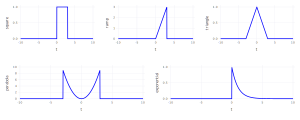

In [18]:
# Visualize functions 
p_sq       = plot(x=t_val, y=[x_sq(t)       for t in t_val], Guide.ylabel("square"),     properties...);
p_ramp     = plot(x=t_val, y=[x_ramp(t)     for t in t_val], Guide.ylabel("ramp"),       properties...);
p_triangle = plot(x=t_val, y=[x_triangle(t) for t in t_val], Guide.ylabel("triangle"),   properties...);
p_parabola = plot(x=t_val, y=[x_parabola(t) for t in t_val], Guide.ylabel("parabola"),   properties...);
p_exp      = plot(x=t_val, y=[x_exp(t)      for t in t_val], Guide.ylabel("exponential"), properties...);

vstack(hstack(p_sq, p_ramp, p_triangle), hstack(p_parabola, p_exp))


The convolution integral is defined as follows:

$$(x*y)(t) \triangleq \int_{-\infty}^\infty x(\tau)y(t-\tau) d\tau$$

In [8]:
#define reimann integral
function riemann(f)
    x_vec = [f(t) for t in t_val];
    return sum(x_vec*t_spacing)
end

riemann (generic function with 1 method)

In [35]:
#definition of the convolution integral. 
function convolution(x,y,t)
    integrand(τ)=x(τ)*y(t-τ);
    
    #Integrate over [-T,T] using riemann sum
    riemann(integrand);
    
    #Integrate numerically with quadgk bounded over [-T,T]
    #return quadgk(integrand,-T,T)[1];
end;

In [29]:
function show_convolution(x,y,t)
    prod = [x(τ)*y(t-τ) for τ in t_val];
    conv = [convolution(x,y,τ) for τ in t_coarse];
    
    p_x = plot(x=t_val, y=[x(τ)   for τ in t_val], properties_x...); 
    p_y = plot(x=t_val, y=[y(t-τ) for τ in t_val], properties_y...);   
    push!(p_y, layer(x=[t], y=[0], properties_time..., Geom.point));

    
    p_prod = plot(x=t_val,    y=prod, properties_prod...);
    p_conv = plot(x=t_coarse, y=conv, properties_conv...);
    
    value = convolution(x,y,t);
    push!(p_conv, layer(x=[t,t], y=[0, value], properties_time...))
    push!(p_conv, layer(x=[t], y=[value], properties_time..., Geom.point))

        
    hstack(vstack(p_x,p_y),vstack(p_prod,p_conv))
end

    

show_convolution (generic function with 1 method)

Interact.Slider{Float64}([Reactive.Input{Float64}] -9.0,"",-9.0,linspace(-10.0,10.0,100))

Interact.Options{:ToggleButtons,Function}([Reactive.Input{Function}] x_sq,"x",x_sq,"square",Interact.OptionDict(Any["square","parabola","ramp","triangle","exp"],Dict{Any,Any}("ramp"=>x_ramp,"triangle"=>x_triangle,"exp"=>x_exp,"parabola"=>x_parabola,"square"=>x_sq)),Any[],Any[])

Interact.Options{:ToggleButtons,Function}([Reactive.Input{Function}] x_sq,"y",x_sq,"square",Interact.OptionDict(Any["square","parabola","ramp","triangle","exp"],Dict{Any,Any}("ramp"=>x_ramp,"triangle"=>x_triangle,"exp"=>x_exp,"parabola"=>x_parabola,"square"=>x_sq)),Any[],Any[])

elapsed time: 1

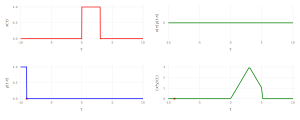

In [36]:
@manipulate for t in slider(t_coarse, value=-9.0),
    x=Dict(:ramp => x_ramp, :square => x_sq, :triangle => x_triangle, :exp => x_exp, :parabola => x_parabola), 
    y=Dict(:ramp => x_ramp, :square => x_sq, :triangle => x_triangle, :exp => x_exp, :parabola => x_parabola)
    
    show_convolution(x, y, t)
    
end